# 05 - Training Results - Experiments with Effective Batch (Gradient Accumulation)

In [1]:
import os

os.chdir('..')

In [2]:
from src.utils import visualization as viz
from src.dev import results

DATA_DIR = 'data/snake_clef2021_dataset/training_history/effective_batch/'


# load specification and progress data
specs_df = results.load_specs_files(DATA_DIR)
df = results.load_progress_files(specs_df, path=DATA_DIR)
specs_df

,model_file,history_file,no_epochs,model,loss,opt,input_size,batch_size,full_ds,aug,scheduler,mixed_precision,learning_rate,total_batch_size,date
0,clef2021_resnest101_ce_06-03-2021_23-11.pth,clef2021_resnest101_ce_06-03-2021_23-11.csv,30,resnest101,ce,adam,256,128,False,False,True,False,0.001,1024,06-03-2021_23-11
1,clef2021_resnest101_ce_06-06-2021_18-13.pth,clef2021_resnest101_ce_06-06-2021_18-13.csv,30,resnest101,ce,adam,256,128,False,False,True,False,0.001,512,06-06-2021_18-13


## Fine-tuning ResNeSt-101 with Various Batch Sizes

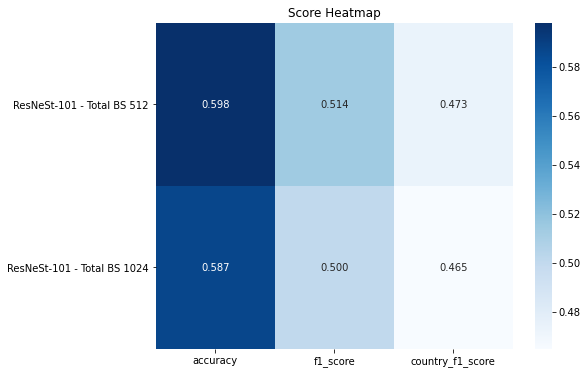

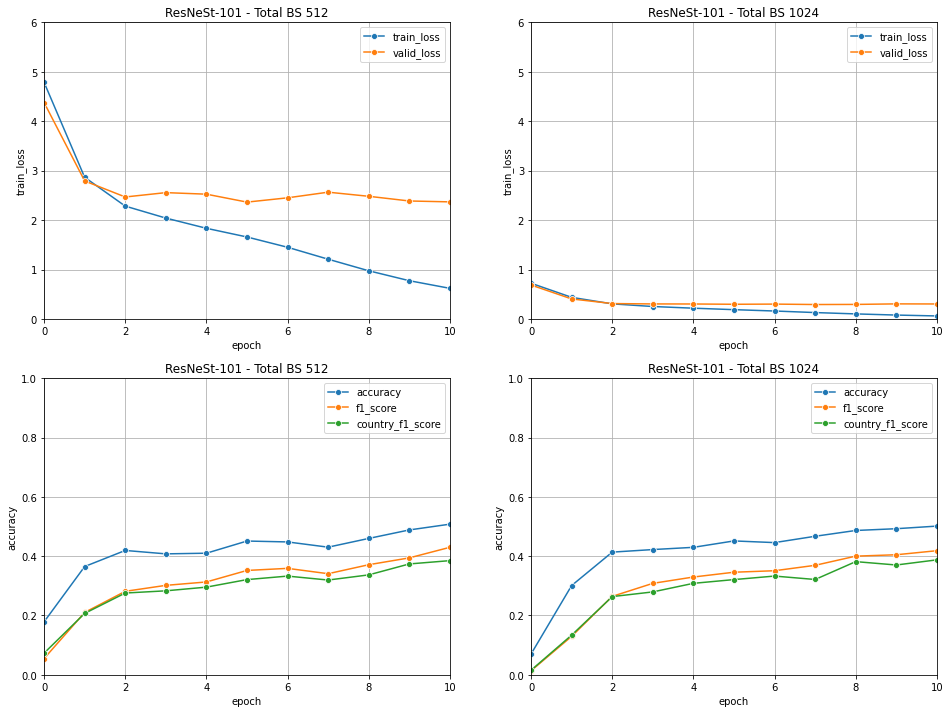

In [3]:
params = dict(model='resnest101', loss='ce', opt='adam', batch_size=128)

g1 = results.filter_items(df, outlen=30, total_batch_size=512, **params)
g2 = results.filter_items(df, outlen=30, total_batch_size=1024, **params)

group_dict = {
    'ResNeSt-101 - Total BS 512': g1, 
    'ResNeSt-101 - Total BS 1024': g2}

viz.plot_score_heatmap(group_dict, cmap='Blues')
viz.compare_training_process(group_dict, xlim=[0, 10])